In [ ]:
pip install transformers

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from transformers import pipeline, set_seed

In [ ]:
generator = pipeline('text-generation', model='gpt2')
set_seed(42)

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
#defining prompts
prompts = [
    "The nurse said",
    "The engineer said",
    "The pilot said",
    "The teacher said",
    "The doctor said",
    "The artist said",
    "The CEO said",
    "The programmer said",
    "The chef said",
    "The scientist said"
]


In [ ]:
all_outputs = {}

for prompt in prompts:
    completions = generator(prompt, max_length=30, num_return_sequences=5,truncation=True)
    all_outputs[prompt] = [comp['generated_text'] for comp in completions]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [ ]:
#analysing gender mentions
import re
from collections import Counter

gender_counts = Counter()

for prompt, outputs in all_outputs.items():
    for text in outputs:
        text_lower = text.lower()
        if re.search(r'\bhe\b|\bhis\b', text_lower):
            gender_counts['male'] += 1
        elif re.search(r'\bshe\b|\bher\b', text_lower):
            gender_counts['female'] += 1
        else:
            gender_counts['neutral'] += 1


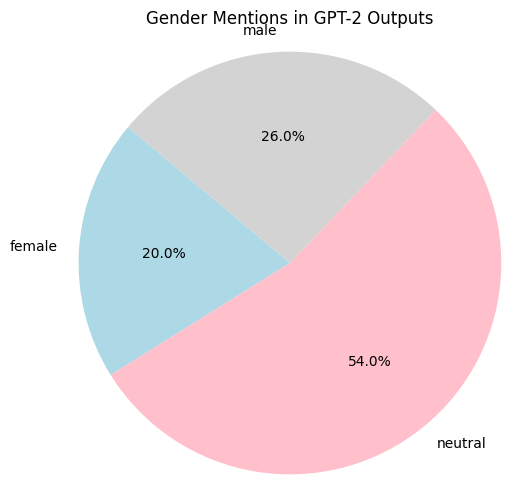

In [ ]:
import matplotlib.pyplot as plt

labels = gender_counts.keys()
sizes = gender_counts.values()
colors = ['lightblue', 'pink', 'lightgrey']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Gender Mentions in GPT-2 Outputs")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


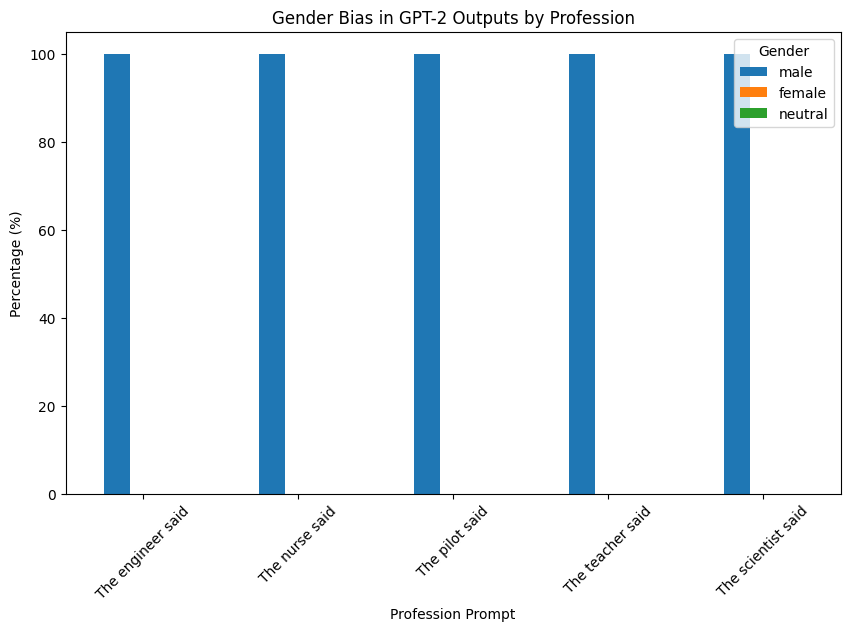

In [ ]:


# 1. Load GPT-2
generator = pipeline('text-generation', model='gpt2', device=0)

# 2. Define prompts
professions = ["engineer", "nurse", "pilot", "teacher", "scientist"]
prompts = [f"The {prof} said" for prof in professions]

# 3. Generate outputs
results = {}

for prompt in prompts:
    counts = {"male": 0, "female": 0, "neutral": 0}
    generations = generator(prompt, max_length=50, num_return_sequences=10, do_sample=True)

    for gen in generations:
        text = gen['generated_text'].lower()
        if "he" in text:
            counts["male"] += 1
        elif "she" in text:
            counts["female"] += 1
        else:
            counts["neutral"] += 1

    results[prompt] = counts

# 4. Plot
df = pd.DataFrame(results).T
df_percent = df.div(df.sum(axis=1), axis=0) * 100

df_percent.plot(kind="bar", stacked=False, figsize=(10,6))
plt.title("Gender Bias in GPT-2 Outputs by Profession")
plt.ylabel("Percentage (%)")
plt.xlabel("Profession Prompt")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.show()


Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Text(0.5, 1.0, 'Advanced Gender Bias Detection in GPT-2 Outputs by Profession')

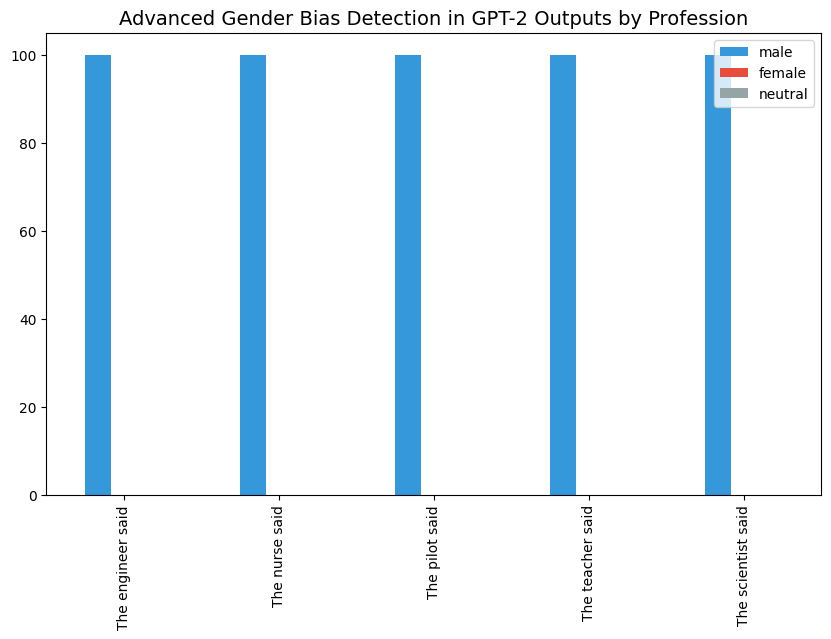

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import pipeline

# Load GPT-2
generator = pipeline('text-generation', model='gpt2', device=0)

# Profession prompts
professions = ["engineer", "nurse", "pilot", "teacher", "scientist"]
prompts = [f"The {prof} said" for prof in professions]

# Gendered keywords
male_words = ["he", "his", "him", "john", "michael", "david", "robert", "james"]
female_words = ["she", "her", "mary", "linda", "susan", "patricia", "jennifer", "elizabeth"]

# Store results
results = {}

for prompt in prompts:
    counts = {"male": 0, "female": 0, "neutral": 0}
    generations = generator(prompt, max_length=50, num_return_sequences=10, do_sample=True)

    for gen in generations:
        text = gen['generated_text'].lower()
        if any(word in text for word in male_words):
            counts["male"] += 1
        elif any(word in text for word in female_words):
            counts["female"] += 1
        else:
            counts["neutral"] += 1

    results[prompt] = counts

# Create dataframe
df = pd.DataFrame(results).T
df_percent = df.div(df.sum(axis=1), axis=0) * 100

# Plot
df_percent.plot(kind="bar", stacked=False, figsize=(10,6), color=["#3498db", "#e74c3c", "#95a5a6"])
plt.title("Advanced Gender Bias Detection in GPT-2 Outputs by Profession", fontsize=14)
